<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20220618.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* regressor 
* customer analysis

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotnine as gg 
from plotnine import ggplot, aes
from datetime import datetime, date, time, timezone, timedelta
import os

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression, LogisticRegression 
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, f1_score, mean_squared_error
import sklearn.datasets as skd

# regressor

In [3]:
raw = skd.load_breast_cancer()
x = pd.DataFrame(raw['data'], columns = raw['feature_names'])
y = raw['target']
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
scaler = StandardScaler()
x_pca = scaler.fit_transform(x)
pca = PCA(n_components = 10)
x_pca = pca.fit_transform(x_pca)

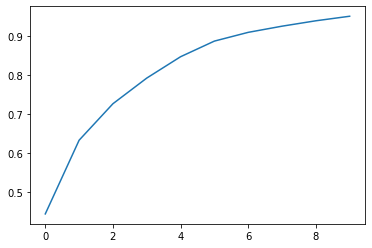

In [5]:
plt.plot(pca.explained_variance_ratio_.cumsum())

In [8]:
x_pca = pd.DataFrame(np.c_[x_pca, y.reshape(-1,1)], columns = [f'pc{a}' for a in range(1,11)] + ['target'])
x_pca.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,target
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159371,-0.398399,-0.157126,-0.877400,0.0
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013356,0.240970,-0.711902,1.106980,0.0
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097380,0.024064,0.454279,0.0
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053421,1.429915,1.059597,-1.405435,-1.116947,0.0
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936211,0.636387,-0.263801,0.377718,0.0


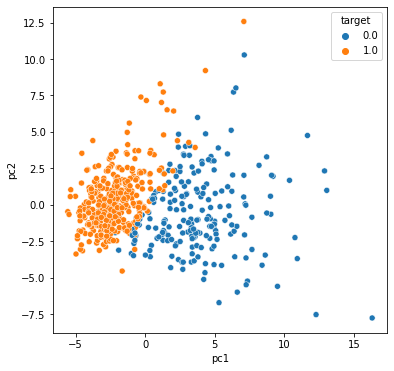

In [9]:
plt.figure(figsize = [6,6])
sns.scatterplot(data = x_pca, x = 'pc1', y = 'pc2', hue = 'target')

In [11]:
x_tr, x_te, y_tr, y_te = train_test_split(x, y, train_size = .7)

In [12]:
fit_rf = RandomForestClassifier().fit(x_tr, y_tr)
pred_rf = fit_rf.predict(x_te)
proba_rf = fit_rf.predict_proba(x_te)[:,-1]

In [13]:
accuracy_score(y_te, pred_rf)

0.9766081871345029

In [14]:
fpr, tpr, thre = roc_curve(y_te, proba_rf)

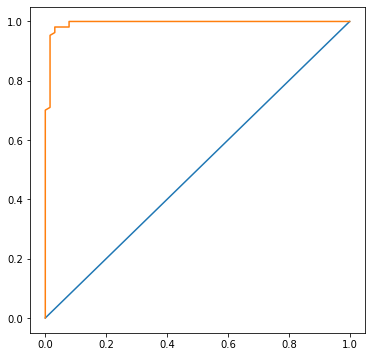

In [15]:
plt.figure(figsize = [6,6])
plt.plot([0,1],[0,1])
plt.plot(fpr, tpr)

In [36]:
scaler = StandardScaler()
x_knn = scaler.fit_transform(x)
knn = KMeans()

In [26]:
from yellowbrick.cluster import KElbowVisualizer

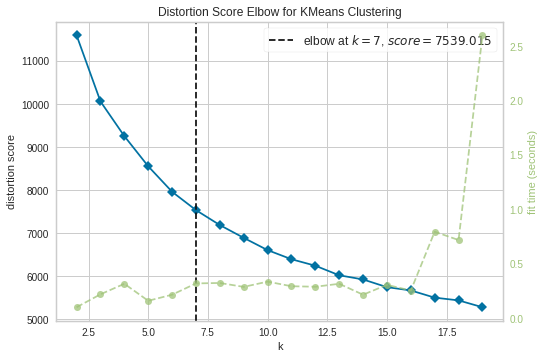

In [37]:
elbow = KElbowVisualizer(knn, k = (2, 20)).fit(x_knn)
elbow.show()

In [30]:
elbow.elbow_value_   

8

# customer analysis

In [46]:
os.listdir()

['.config',
 'shops.csv',
 'rfm_test.csv',
 'sample_submission.csv',
 'items.csv',
 'retail_data_response.csv',
 'online_retail_II.xlsx',
 '.Rhistory',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'sales_train.csv',
 'item_categories.csv',
 'test.csv',
 'ecommerce-data.csv',
 'retail_data_transactions.csv',
 'sample_data']

In [49]:
df = pd.read_csv('ecommerce-data.csv', encoding = 'unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [50]:
df.columns = [a.lower() for a in df.columns]
df.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [51]:
df.isnull().sum()

invoiceno           0
stockcode           0
description      1454
quantity            0
invoicedate         0
unitprice           0
customerid     135080
country             0
dtype: int64

In [89]:
df_ = df[~df['customerid'].isnull()]
df_ = df_[(df_['country'] == 'United Kingdom') & (~df_['invoiceno'].astype(str).str.contains('C')) ]
df_.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [90]:
df_['invoicedate'] = pd.to_datetime(df_['invoicedate'])
df_['date'] = df_['invoicedate'].to_numpy().astype('datetime64[D]')
df_['month'] = df_['invoicedate'].to_numpy().astype('datetime64[M]')
df_['rev'] = df_['unitprice'] * df_['quantity']
df_.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,date,month,rev
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,20.34


In [91]:
df_ = df_[['customerid', 'date', 'month', 'rev']].rename(columns = {'customerid':'id'}).sort_values(['id', 'date'])
df_.head()

,id,date,month,rev
61619,12346.0,2011-01-18,2011-01-01,77183.60
9754,12747.0,2010-12-05,2010-12-01,30.60
9755,12747.0,2010-12-05,2010-12-01,15.30
9756,12747.0,2010-12-05,2010-12-01,27.04
9757,12747.0,2010-12-05,2010-12-01,39.60


In [92]:
df_ = df_.groupby(['id', 'date', 'month'])['rev'].sum().reset_index()
df_.head()

,id,date,month,rev
0,12346.0,2011-01-18,2011-01-01,77183.60
1,12747.0,2010-12-05,2010-12-01,358.56
2,12747.0,2010-12-13,2010-12-01,347.71
3,12747.0,2011-01-20,2011-01-01,303.04
4,12747.0,2011-03-01,2011-03-01,310.78


In [93]:
info_m = df_.groupby(['id', 'month'])['rev'].sum().reset_index().rename(columns = {'rev':'money'})
info_m = pd.pivot_table(info_m, index = 'id', columns = 'month', values = 'money').reset_index()
info_m = pd.melt(info_m, id_vars = 'id', var_name = 'month', value_name = 'money').sort_values(['id', 'month'], ascending = [1, 0])
info_m = info_m.groupby(['id']).head(3)
info_m = info_m.groupby(['id'])['money'].sum().reset_index()
info_m.head()

,id,money
0,12346.0,0.00
1,12747.0,1426.61
2,12748.0,14002.34
3,12749.0,1335.65
4,12820.0,554.11


In [94]:
info_f = df_.groupby(['id', 'month'])['rev'].count().reset_index().rename(columns = {'rev':'freq'})
info_f = pd.pivot_table(info_f, index = 'id', columns = 'month', values = 'freq').reset_index()
info_f = pd.melt(info_f, id_vars = 'id', var_name = 'month', value_name = 'freq').sort_values(['id', 'month'], ascending = [1, 0])
info_f = info_f.groupby(['id']).head(3)
info_f = info_f.groupby(['id'])['freq'].sum().reset_index()
info_f.head()

,id,freq
0,12346.0,0.0
1,12747.0,3.0
2,12748.0,33.0
3,12749.0,2.0
4,12820.0,2.0


In [95]:
date_now = datetime(2011,12,31)
date_now

datetime.datetime(2011, 12, 31, 0, 0)

In [96]:
df_ = df_.sort_values(['id','date'], ascending = [1, 0])
df_.head()

,id,date,month,rev
0,12346.0,2011-01-18,2011-01-01,77183.60
11,12747.0,2011-12-07,2011-12-01,438.50
10,12747.0,2011-11-17,2011-11-01,312.73
9,12747.0,2011-10-04,2011-10-01,675.38
8,12747.0,2011-08-22,2011-08-01,301.70


In [97]:
info_r = df_.groupby(['id']).agg({'date':lambda x : (date_now - x.max()).days}).reset_index().rename(columns = {'date':'recency'})
info_r.head()

,id,recency
0,12346.0,347
1,12747.0,24
2,12748.0,22
3,12749.0,25
4,12820.0,25


In [100]:
info = pd.merge(pd.merge(info_f, info_r, 'left', 'id'), info_m, 'left', 'id')
info.head()

,id,freq,recency,money
0,12346.0,0.0,347,0.00
1,12747.0,3.0,24,1426.61
2,12748.0,33.0,22,14002.34
3,12749.0,2.0,25,1335.65
4,12820.0,2.0,25,554.11


In [106]:
fit_info = scaler.fit_transform(info.iloc[:,1:4])
fit_info = pd.DataFrame(fit_info, columns = info.columns[1:4])

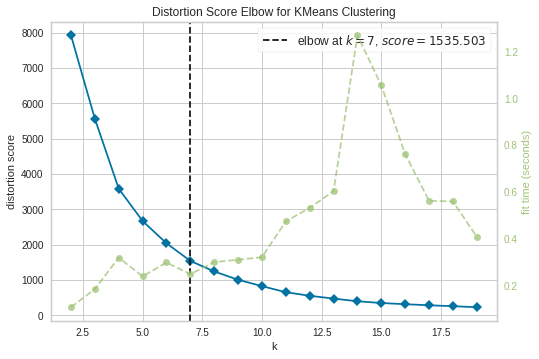

In [108]:
knn = KMeans()
elbow = KElbowVisualizer(knn, k = (2, 20)).fit(fit_info)
elbow.show()

In [114]:
fit_km = KMeans(n_clusters=7, init= 'k-means++', max_iter=1000).fit(fit_info)
fit_km

KMeans(max_iter=1000, n_clusters=7)

In [124]:
info_ = pd.DataFrame(np.c_[info.values, fit_km.labels_.reshape(-1,1)], columns = info.columns.tolist() + ['cl'])
info_.head()

,id,freq,recency,money,cl
0,12346.0,0.0,347.0,0.00,1.0
1,12747.0,3.0,24.0,1426.61,4.0
2,12748.0,33.0,22.0,14002.34,6.0
3,12749.0,2.0,25.0,1335.65,0.0
4,12820.0,2.0,25.0,554.11,0.0


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.7/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/usr/local/lib/python3.7/dist-packages/statsmodels/sandbox/nonparametric/kernels.py:204: RuntimeWarning: divide by zero encountered in double_scalars
  w = 1. / (h * n) * np.sum(self((xs-x)/h), axis=0)
/usr/local/lib/python3.7/dist-packages/statsmodels/sandbox/nonparametric/kernels.py:204: RuntimeWarning: divide by zero encountered in true_divide
  w = 1. / (h * n) * np.sum(self((xs-x)/h), axis=0)
/usr/local/lib/pyt

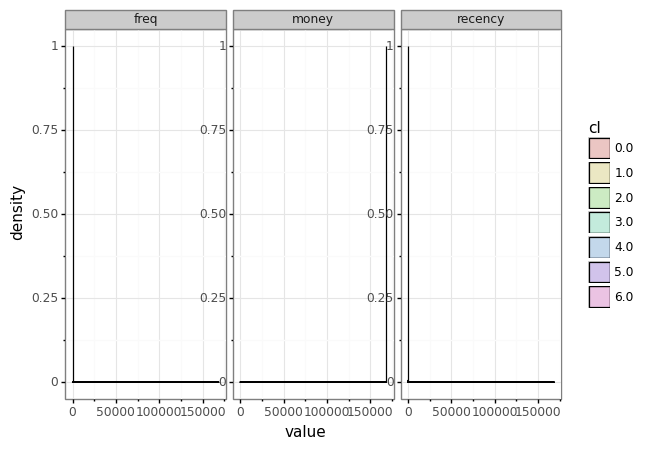

<ggplot: (8751334256777)>

In [128]:
(
    ggplot(pd.melt(info_.assign(cl = info_['cl'].astype(str)).drop('id',axis = 1), id_vars = 'cl'),
           aes('value', fill = 'cl')
           ) +
    gg.geom_density(alpha = .3) +
    gg.facet_wrap('~variable', scales = 'free_y') +
    gg.theme_bw()
)

In [141]:
pca = PCA(n_components = 3)
fit_pca = pca.fit_transform(scaler.fit_transform(info.iloc[:,1:4]))
fit_pca = pd.DataFrame(np.c_[fit_pca, fit_km.labels_.reshape(-1,1)], columns = [f'pc{a}' for a in range(1,4)] + ['cl'])
fit_pca.head()

,pc1,pc2,pc3,cl
0,-1.942707,1.078201,-1.019997,1.0
1,1.424627,-0.361966,-0.220173,4.0
2,15.241488,0.674208,-12.710846,6.0
3,0.999434,-0.309662,0.214766,0.0
4,0.901693,-0.505521,0.156499,0.0


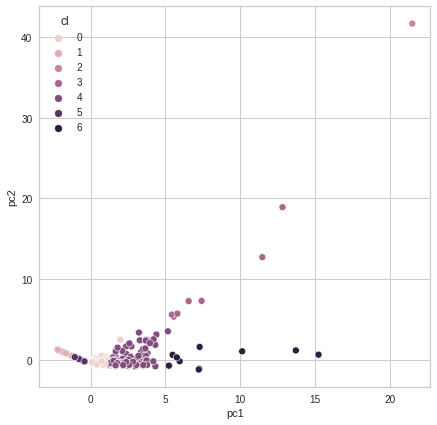

In [142]:
plt.figure(figsize = [7,7])
sns.scatterplot(data = fit_pca, x = 'pc1', y = 'pc2', hue = 'cl')